In [1]:
# Importando a biblioteca Pandas
import pandas as pd

In [2]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#juntando todos os arquivos 
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#pegando uma amostra dos dados - aleatório
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
124,Natal,2019-01-02,44.82,1034,3
206,Natal,2019-01-02,151.45,1036,2
17,Natal,2018-02-18,276.00,854,3
197,Natal,2019-01-02,10.45,1036,2
14,Fortaleza,2019-01-12,132.68,1005,1


In [7]:
#verificando o tipo de dado das colunas 
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")



In [9]:
#tratar valores nulos - soma a quantidade com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#substituir valores nulos pela média de vendas 
df["Vendas"].fillna(df["Vendas"].mean(),inplace=True)

In [ ]:
#substituir valores nulos por zero 
df["Vendas"].fillna(0,inplace=True)

In [ ]:
#Apagando linhas com valores nulos 
df.dropna(inplace=True)

In [ ]:
#Apagando linhas com valores nulos em apenas uma coluna
df.dropna(subset=["Vendas"],inplace=True)

In [13]:
#Criando colunas
#Criando a coluna de receitas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#Retornando a maior receita 
df["Receitas"].max()

3544.0

In [20]:
#nlargest - top3 receitas
df.nlargest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
#nsmallest - 3 piores receitas
df.nsmallest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [22]:
#Agrupamento por cidade - Soma as receitas por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [15]:
#ordenando o conjunto de dados do maior para o menor
df.sort_values("Receitas",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [16]:
#Transformando coluna Data em tipo inteiro 
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [19]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [18]:
#Transformando a coluna Data em tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [20]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [21]:
#Criando uma coluna com o ano
df["Ano Venda"] = df["Data"].dt.year

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
34,Aracaju,2018-01-01,38.25,1521,6,229.50,2018,1,1,0 days,1
27,Salvador,2019-01-01,145.79,1034,1,145.79,2019,1,1,365 days,1
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019,1,1,365 days,1
60,Fortaleza,2019-01-01,182.14,1002,4,728.56,2019,1,1,365 days,1
14,Salvador,2019-01-12,109.01,1035,2,218.02,2019,1,12,376 days,1


In [23]:
#extraindo mês e dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)


In [25]:
#retornando data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [26]:
#Calculando a diferença de dias 
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [29]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter


In [31]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [32]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [33]:
#VISUALIZAÇÃO DOS DADOS 

#Value_counts - conta quantas linhas 
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

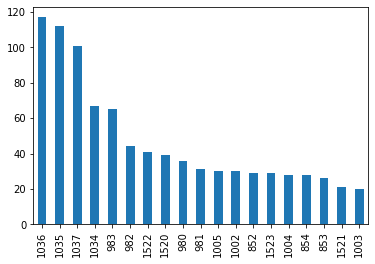

In [35]:
#Gráfico de barras 
df["LojaID"].value_counts(ascending=False).plot.bar()

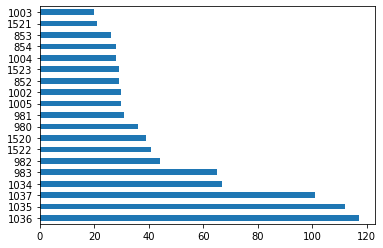

In [36]:
#Grafico de barras horizontais 
df["LojaID"].value_counts(ascending=False).plot.barh()

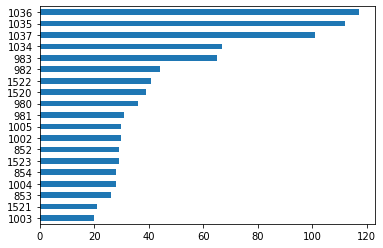

In [39]:
df["LojaID"].value_counts(ascending=True).plot.barh();

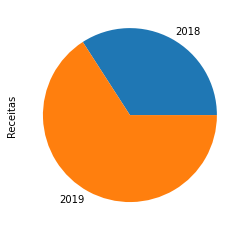

In [41]:
#Gráfico de Pizza por ano e receita
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie()

In [42]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [43]:
#Importando biblioteca matplotlib
import matplotlib.pyplot as plt

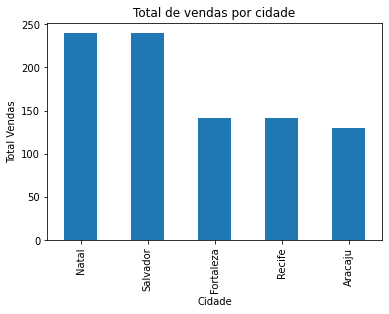

In [46]:
#adicionando um título e alterando o nome dos eixos
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

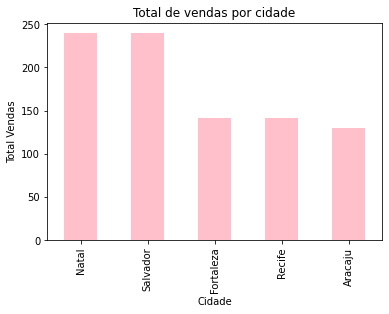

In [49]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade",color="pink")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [50]:
#Alterando o estilo - consultar documentação do matplotbib - usar estilo ggplot
plt.style.use("ggplot")


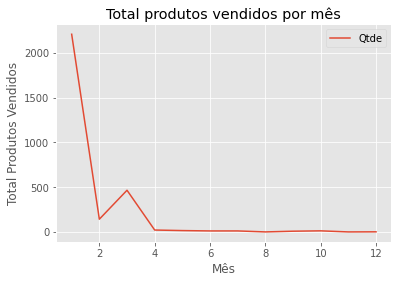

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [53]:
#Quantidade de vendas por mes
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [55]:
#Selecionado apenas as vendas de 2019
df_2019 = df[df["Ano Venda"] == 2019]

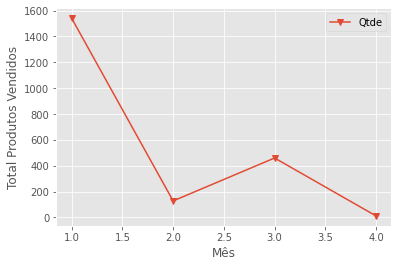

In [57]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();



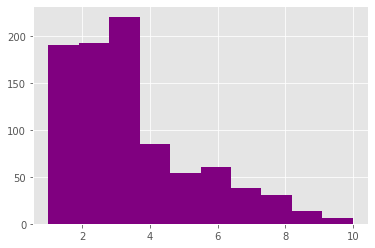

In [59]:
#Histograma
plt.hist(df["Qtde"],color="purple");

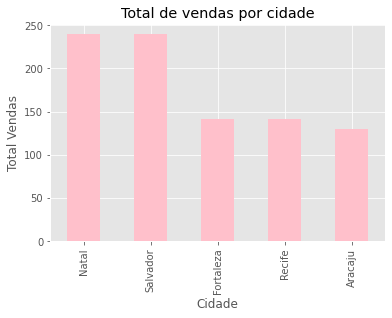

In [61]:
#salvando em png
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade",color="pink")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");
plt.savefig("Grafico total x cidade.png")